Здравствуйте. Сразу хочу сказать, что отправляю данный ноутбук с просьбой помочь. Увы, у меня не получилось добиться установленной планки качества. Не могли бы вы посмотреть, что я делаю не так, или где я допустил ошибку. Мое предположение, что я почти совсем не пытался улучшить качество текстов. Другой вариант - опять же из-за отсутствия качественной обработки или даже очистки текстов размерность эмбеддингов получилась слишком большой (512 - ограничение Bert-a), что в свою очередь могло привести к плохим результатам классификации из-за проклятия размерности.

Дисбаланс классов я заметил, я попробовал обучить классификаторы ниже на более сбалансированной выборке, но результат лучше не стал.

В качестве модели для получения эмбеддингов я выбрал DistilBert. Я зафайнтюнил его на классификацию. 3 эпохи у меня заняли чуть больше часа, чтобы обучить только параметры двух последних слоев (отвечающих за классификацию) и собрать эмбеддинги. Чтобы далее я мог не переобучать модель каждый раз, я сохранил ее веса, а также эмбеддинги, чтобы потом их просто подгружать из файла.

Заранее спасибо за любую помощь.

<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Петр! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

# Определение токсичных комментариев в интернет-магазине "Викишоп" с помощью DistilBert

**Описание:** интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию.

**Цель:** создать классификатор, способный отделять токсичные коммментарии от приемлемых. При этом классификатор должен получать не меньше $0.75$ по метрике $F1$.

**Задачи:**

1) Перевести тексты в наборы токенов, соответствующих выбранной модели.
2) С помощью выбранной модели получить эмбеддинги для текстов.
3) Обучить различные модели классификации решать поставленную задачу.

---

### Подготовка среды

In [1]:
import gc
import os
import re
import random
from typing import Iterator, List, Tuple
from itertools import compress
from time import sleep, time
import tqdm.notebook as tq

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.express.colors import qualitative
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import torch
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import transformers
from optimum.bettertransformer import BetterTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler

from catboost import CatBoostClassifier, Pool

import umap
import umap.plot
from sklearn.decomposition import PCA

d:\Anaconda\envs\ExpEnv\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
d:\Anaconda\envs\ExpEnv\Lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Anaconda\envs\ExpEnv\Lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Anaconda\envs\ExpEnv\Lib

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> Не все модули установлены. </span>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [2]:
# Задаем различные сиды, чтобы добиться лучшей воспроизводимости результатов
RANDOM_SEED = 21092024
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

batch_size = 32
small_batch_size = 8

models_path = 'models/'
embeddings_path = 'embeddings/'

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

cuda:0


In [3]:
def clean_a_bit():
    with torch.no_grad():
        torch.cuda.empty_cache()
    gc.collect() 

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Для этой задачи существуют специальные модели, например 'unitary/toxic-bert'</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что есть вариативность по процессорам.</font>

In [4]:
clean_a_bit()

In [5]:
if not os.path.exists(models_path):
    os.makedirs(models_path)

In [6]:
if not os.path.exists(embeddings_path):
    os.makedirs(embeddings_path)

In [7]:
model_scores = dict()

---

### Чтение данных, первичная предобработка и разбиение на train-test

In [8]:
df = pd.read_csv('datasets/toxic_comments.csv', index_col=0)
df.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [9]:
df['toxic'].value_counts()

toxic
0    143106
1     16186
Name: count, dtype: int64

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Мы обнаружили серьёзный дисбаланс при исследовании данных. Как дополнительные материалы, рекомендую статью <a href='https://dyakonov.org/2021/05/27/imbalance/'>Дисбаланс классов</a>, очень классная, как и весь блог Дьяконова. Ещё такой <a href='https://github.com/Dyakonov/ml_hacks/blob/master/book_disbalance_public_v1.ipynb'>ноутбук</a> есть.</font>

Имеется сильный дисбаланс классов. Попробуем что-нибудь с этим сделать на этапе обучения классических классификаторов позже.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

Проведем легкую очистку данных, удалив из строк последовательности символов, не имеющие особой информативности. Фильтры для строк были подобраны после беглого обзора имеющейся выборки, поэтому проведенная предобработка не является исчерпывающей.  

In [10]:
def clean_text(text):
    # html
    text = re.sub(r'<.*?>', '', text)
    # http, www
    text = re.sub(r'http\S+|www\S+', '', text)
    # удаляем все символы пунктуации, предшествующие тексту
    text = re.sub(r'^[\W_]+', '', text)
    # сокращаем последовательности 3 и более повторяющихся символов до одного символа
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # последовательности чисел через точку. Если чисел больше трех, то это уже вряд ли дата
    text = re.sub(r'\b(\d+\.){3,}\d+\b', '', text)
    # удаляем все ненужные символы, сохраняем латиницу и некоторую важную пунктуацию
    text = re.sub(r'[^a-zA-Z,:;\'!?.\s\d]', '', text)
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    return text

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очистка сделана верно! Мы оставили только символы Латинского алфавита.</font> 

In [11]:
df['cleaner_text'] = df['text'].apply(clean_text)

In [12]:
num_words = df['cleaner_text'].str.split().apply(len).sort_values()
num_words[:5]

93965     0
153499    0
147553    0
63057     0
19792     0
Name: cleaner_text, dtype: int64

Теперь посмотрим на распределение текстов по количеству строк в последовательности.

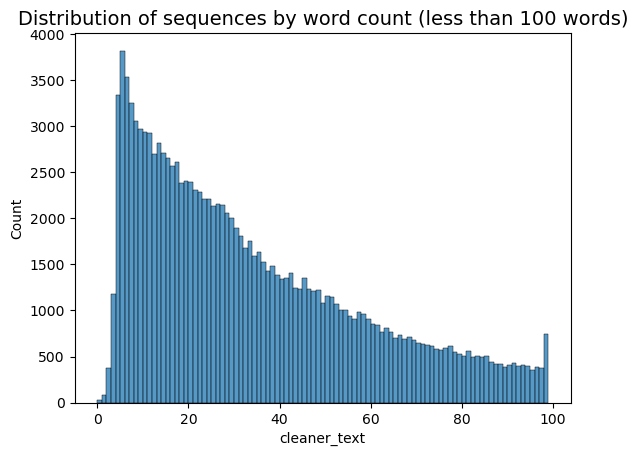

In [13]:
sns.histplot(data=num_words[num_words[num_words < 100].index], bins=99)
plt.title('Distribution of sequences by word count (less than 100 words)', fontsize=14)
plt.show()

Близкий осмотр распределения текстов по их длинне выявляет большое количество текстов с крайне малым числом слов. В целом в выборке больше всего текстов из 4-6 слов. Однако в выборке имеются пустые тексты, а также тексты, содержашие менее трех слов. Т.к. кол-во текстов с тремя словами сравнимо с текстами прочих длин, чего не скажешь о более коротких текстах, удалим все последовательности слов, содержащие менее трех слов.

In [14]:
print(df.shape)
df = df.drop(index=num_words[num_words < 3].index)
print(df.shape)

(159292, 3)
(158816, 3)


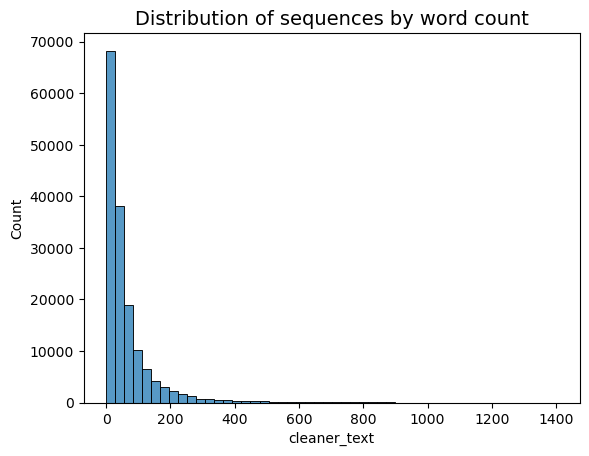

Sequences with more than 512 words:  1930


In [15]:
sns.histplot(data=num_words, bins=50)
plt.title('Distribution of sequences by word count', fontsize=14)
plt.show()

upper_bound = 512

print(f'Sequences with more than {upper_bound} words: ', len(num_words[num_words > upper_bound]))

В выборке присутствует некоторое количество довольно длинных текстов (более 400 слов). Однако их плотность снижается с ростом длины текста. Т.к. таких текстов относительно немного, удалим слишком длинные тексты, проведя границу на уровне 512 слов.

In [16]:
print(df.shape)
df = df.drop(index=num_words[num_words > upper_bound].index)
print(df.shape)

del num_words

(158816, 3)
(156886, 3)


In [17]:
# df[['cleaner_text', 'toxic']].to_csv('datasets/clear_text.csv', index=True)

Теперь разобъем выборку на тренировочную, тестовую и валидационную.

> Т.к. в прошлый раз возникло недопонимание, сразу отмечу, что мои наименования подвыборок не соответствуют общеупотребляемым. В моем случае тестовая выборка применялась для сравнения моделей, а валидационная - для оценки качества выбранной лучшей модели. Я не стал переименовывать выборки, т.к. это повлекло бы большое количество прочих переименований.

In [18]:
texts_train, texts_test, target_train, target_test = train_test_split(df['cleaner_text'], 
                                                                      df['toxic'], 
                                                                      test_size=0.2, 
                                                                      stratify=df['toxic'], 
                                                                      random_state=RANDOM_SEED)
texts_train.shape, texts_test.shape

((125508,), (31378,))

In [19]:
texts_test, texts_eval, target_test, target_eval = train_test_split(texts_test, 
                                                                    target_test, 
                                                                    test_size=0.4, 
                                                                    stratify=target_test, 
                                                                    random_state=RANDOM_SEED)
texts_test.shape, texts_eval.shape

((18826,), (12552,))

In [20]:
display(target_train.value_counts().to_frame().T)
display(target_test.value_counts().to_frame().T)
display(target_eval.value_counts().to_frame().T)

toxic,0,1
count,112761,12747


toxic,0,1
count,16914,1912


toxic,0,1
count,11277,1275


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Здорово, что у нас есть три выборки!</font>

In [21]:
del df
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

---

### 1. DistilBert + BetterTransformer (fp32)

Начнем сначала с попыток обучить модели на имеющейся выборке решать поставленную задачу бинарной классификации текстов. Будем файнтюнить модель $DistilBERT$. Выбор пал именно на эту модель по причине ее крайне малых размеров (всего 65.8 млн параметров). Малые размеры модели позволяют обучать ее относительно быстро, при этом экономя доступную видеопамять. Кроме того, инференс модели таких размеров также производится гораздо быстрее, чем у более габаритных моделей.

Стоит отметить, что в данном случае была выбрана модификация модели, чувствительная к регистру, из соображений, что слова, написанные в верхнем регистре, могут иметь сильный эмоциональный оттенок и передавать эмоциональное возбуждение автора. А в интернете чаще всплеск эмоций сопровождается негативными комментариями, нежели позитивными.

Для ускорения обучения будем использовать модифицированную реализацию трансформеров - $BetterTransformer$. Со страницы на [Huggingface](https://huggingface.co/docs/transformers/perf_infer_gpu_one#bettertransformer) о *BetterTransformer*: 

BetterTransformer ускоряет инференс с помощью *fastpath* (собственной специализированной реализации функций трансформера в $PyTorch$). Две оптимизации при выполнении *fastpath* - это:

1) слияние, которое объединяет несколько последовательных операций в одно «ядро», чтобы сократить количество шагов вычислений;
2) пропуск присущей паддингам разреженности, чтобы избежать ненужных вычислений с вложенными тензорами.

BetterTransformer также преобразует все операции внимания(attention) в более эффективные с точки зрения памяти операции внимания(attention) с использованием масштабированного скалярного произведения ($SDPA$) и вызывает оптимизированные ядра, такие как $FlashAttention$, под капотом.

In [22]:
model_class, tokenizer_class, pretrained_weights = (
    transformers.DistilBertForSequenceClassification,
    transformers.DistilBertTokenizer,
    'distilbert/distilbert-base-cased'
)

db_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
distilbert_model = (model_class
                    .from_pretrained(pretrained_weights, 
                                    num_labels=2, # почему не 1 для получения логита только положительного класса?
                                    torch_dtype=torch.float32,
                                    # attn_implementation="flash_attention_2", # Не получилось совместить flash-attention 2 с BetterTranformer
                                    output_attentions=False, 
                                    output_hidden_states=True))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
params = list(distilbert_model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:4]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[4:16]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 104 different named parameters.

==== Embedding Layer ====

distilbert.embeddings.word_embeddings.weight            (28996, 768)
distilbert.embeddings.position_embeddings.weight          (512, 768)
distilbert.embeddings.LayerNorm.weight                        (768,)
distilbert.embeddings.LayerNorm.bias                          (768,)

==== First Transformer ====

distilbert.transformer.layer.0.attention.q_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.q_lin.bias           (768,)
distilbert.transformer.layer.0.attention.k_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.k_lin.bias           (768,)
distilbert.transformer.layer.0.attention.v_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.v_lin.bias           (768,)
distilbert.transformer.layer.0.attention.out_lin.weight   (768, 768)
distilbert.transformer.layer.0.attention.out_lin.bias         (768,)
distilbert.transformer.layer.0.sa_layer_norm.weight           (

Отключим градиенты для всех параметров Bert-a, кроме тех, что отвечают непосредственно за классификацию, чтобы избежать переобучения предобученной части модели и сконцентрироваться на файнтюнинге. 

In [24]:
distilbert_model.to(device)

distilbert_model = BetterTransformer.transform(distilbert_model)
print(distilbert_model)

The BetterTransformer implementation does not support padding during training, as the fused kernels do not support attention masks. Beware that passing padded batched data during training may result in unexpected outputs. Please refer to https://huggingface.co/docs/optimum/bettertransformer/overview for more details.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x DistilBertLayerBetterTransformer(
          (act_fn_callable): GELUActivation()
        )
      )
    )
  )
  (pre_classifier): Linear(in_features=768, out_features=768, bias=True)
  (classifier): Linear(in_features=768, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [25]:
for param in distilbert_model.base_model.parameters():
    param.requires_grad = False

trainable_params = [param for param in distilbert_model.parameters() if param.requires_grad]

In [26]:
params = [params for params in distilbert_model.named_parameters() if params[1].requires_grad]

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Output Layer ====\n')

for p in params:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("\n{:<55} {:>12}".format('Total number of trainable parameters', sum(p.numel() for p in trainable_params)))

The BERT model has 4 different named parameters.

==== Output Layer ====

pre_classifier.weight                                     (768, 768)
pre_classifier.bias                                           (768,)
classifier.weight                                           (2, 768)
classifier.bias                                                 (2,)

Total number of trainable parameters                          592130


Теперь токенизируем входные тексты для правильной работы модели. 

In [27]:
texts_train_tokens = db_tokenizer(list(texts_train), 
                                  truncation=True, 
                                  max_length=512, 
                                  padding=False, 
                                  add_special_tokens=True) # return_tensors='pt'

In [28]:
texts_test_tokens = db_tokenizer(list(texts_test), 
                                 truncation=True, 
                                 max_length=512, 
                                 padding=False, 
                                 add_special_tokens=True)

In [29]:
texts_eval_tokens = db_tokenizer(list(texts_eval), 
                                 truncation=True, 
                                 max_length=512, 
                                 padding=True, 
                                 add_special_tokens=True)

In [30]:
tmp_dataset = TensorDataset(torch.tensor(texts_eval_tokens['input_ids']),
                            torch.tensor(target_eval.values, dtype=torch.float32),
                            torch.tensor(texts_eval_tokens['attention_mask']))

tmp_loader = DataLoader(tmp_dataset, batch_size=batch_size, num_workers=2)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что подрезаешь вектор токенов в Токенизаторе.</font>

Ранее при преобразовании модели в *BetterTransformer* можно было заметить предупреждение, что в ходе обучения модели типа *BetterTransformer* отбрасывают *attention_mask*, что может приводить к неправильной работе модели в случае, если тексты были приведены к одной длине с помощью паддинг-токенов. В связи с этим реализуем следующую стратегию. Во-первых, вместо паддинга последовательностей будем группировать их по длине. Это нужно для того, чтобы было возможно собирать несколько последовательностей в один батч - создать батч из последовательностей разной длины нельзя, т.к. их нельзя будет поместить в один общий тензор. Однако, т.к. не для всех длин текстов будет хватать текстов для составления полноразмерного батча (в данном проекте **размер батча равен 32**), а также не во всех случаях текстов одинаковой длины будет кратное размеру батча количество, чтобы скомпенсировать потенциальные потери в размерах обучающей выборки (особенно в случае второго сценария), только для данной конкретной модели введем мини-батч - батч размера 8. Оставшиеся тексты, не попавшие ни в один из полноразмерных батчей, насолько опять же будет возможно, будут сгруппированы в батчи по 8 последовательностей. Можно было бы и дальше развить эту идею, помещая остатки в батчи размеров вплоть до единственного элемента, однако дабы не замедлять процесс обучения (единичные батчи вроде не особо эффективно обрабатываются GPU), будем остатки отбрасывать. Однако это не значит, что выброшенные последовательности не будут увидены моделью. В начале каждой эпохи сгруппированные последовательности одинаковой длины будут перемешиваться, а значит часть ранее отброшенных текстов теоретически может попасть в новую обучающую выборку. Весь описанный функционал реализован в сэмплере $CustomBatchSampler$ для *DataLoader*.

Во-вторых, как можно было заметить ранее, при токенизации паддинг все же был осуществлен. ~~Сделано это с той целью, что для обучения следующей модели (тоже $DistilBERT$) описанный выше подход применять не надо, а значит для правильной работы модели необходимо будем передавать на вход также *attention_mask*, т.к. ей надо будет отличать контекстные токены от паддингов. В рассчетом на повторное использование токенов, чтобы не токенизировать тексты дважды~~, реализуем кастомный датасет, в котором при инициализации будем с помощью все того же *attention_mask* удалять паддинг-токены, приводя входные данные к виду, оптимальному для применения BetterTransformer.

Warning:
> The BetterTransformer implementation does not support padding during training, as the fused kernels do not support attention masks. Beware that passing padded batched data during training may result in unexpected outputs. Please refer to https://huggingface.co/docs/optimum/bettertransformer/overview for more details.

In [31]:
class TextDataset(Dataset):
    def __init__(self, data: List[List[int]], labels: List[int], attention_masks: List[List[int]] = []):
        super(TextDataset).__init__()
        self.data = data
        self.attention_mask = attention_masks
        self.labels = labels

    def __getitem__(self, idx: int):
        return (self.data[idx], self.labels[idx])

    def __len__(self):
        return len(self.data)
    

# self.data = [
#         list(compress(input_id, list(map(bool, attn_mask)))) 
#         for input_id, attn_mask in zip(data, attention_masks)
#     ]

In [32]:
class CustomBatchSampler(torch.utils.data.Sampler[List[int]]):
    def __init__(self, data: List[str], batch_size: int, small_batch_size: int = 8, shuffle: bool = True) -> None:
        self.sizes = np.array([len(x[0]) for x in data]) 
        self.batch_size = batch_size
        self.small_batch_size = small_batch_size
        self.shuffle = shuffle

        self.rng = np.random.default_rng(RANDOM_SEED)

    # Необъективная оценка
    def __len__(self) -> int:
        return (len(self.sizes) + self.batch_size - 1) // self.batch_size

    def __iter__(self) -> Iterator[List[int]]:
        sorted_indices = np.argsort(self.sizes)[::-1]

        grouped_by_length = {}
        for idx in sorted_indices:
            size = self.sizes[idx]
            if size not in grouped_by_length:
                grouped_by_length[size] = []
            grouped_by_length[size].append(idx)

        if self.shuffle:
            for size, group in grouped_by_length.items():
                self.rng.shuffle(group)

        self.lost_sequences = 0

        for _, indices in grouped_by_length.items():
            num_sequences = len(indices)
            indices = torch.tensor(indices)

            full_main_batches = num_sequences // self.batch_size
            remaining_sequences = num_sequences % self.batch_size

            if full_main_batches > 0:
                for batch in torch.chunk(indices[:self.batch_size * full_main_batches], full_main_batches):
                    yield batch.tolist()

            if remaining_sequences >= self.small_batch_size:
                full_small_batches = remaining_sequences // self.small_batch_size
                remaining_sequences = remaining_sequences % self.small_batch_size

                if full_small_batches > 0:
                    l_idx = self.batch_size * full_main_batches
                    r_idx = l_idx + self.small_batch_size * full_small_batches
                    for batch in torch.chunk(indices[l_idx:r_idx], full_small_batches):
                        yield batch.tolist()

            self.lost_sequences += remaining_sequences

    def get_numer_of_lost_sequences(self):
        return self.lost_sequences

In [33]:
# Для приведения батчей к подходящему виду перед тем, как они будут получены из DataLoader
def my_collate_fn(batch: List[Tuple[List[int], int]]):
    sequences, labels = zip(*batch)
    sequences = torch.tensor(sequences)
    labels = torch.tensor(labels, dtype=torch.float)
    return sequences, labels

In [34]:
db_train_dataset = TextDataset(texts_train_tokens['input_ids'], 
                               target_train.values, 
                               texts_train_tokens['attention_mask'])

db_test_dataset  = TextDataset(texts_test_tokens['input_ids'],  
                               target_test.values,  
                               texts_test_tokens['attention_mask'])

db_eval_dataset  = TextDataset(texts_eval_tokens['input_ids'],  
                               target_eval.values,  
                               texts_eval_tokens['attention_mask'])

In [35]:
db_train_batch_sampler = CustomBatchSampler(db_train_dataset, batch_size, small_batch_size)
db_test_batch_sampler  = CustomBatchSampler(db_test_dataset,  batch_size, small_batch_size)
db_eval_batch_sampler  = CustomBatchSampler(db_eval_dataset,  batch_size, small_batch_size)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Реализуем логику обучения и валидации модели (валидации на трейн-выборке, на всякий случай повторяю). Добавим в реализацию возможность использовать *mixed-precision learning* (будет пояснено для следующей модели).

In [36]:
def train_model(data_loader, model, loss_fn, optimizer, datatype, use_attn_mask=True, return_embeddings=False):
    
    model.train()
    train_loss = 0
    cast_flag = (datatype == torch.float16 or datatype == torch.bfloat16)
    if cast_flag:
        scaler = torch.amp.GradScaler()

    if return_embeddings:
        embeddings = []

    for batch in tq.tqdm(data_loader, desc='Training'):
        if use_attn_mask:
            input_ids, labels, attn_mask = [b.to(device) for b in batch]
            if cast_flag:
                with torch.amp.autocast(device_type='cuda', dtype=datatype):
                    outputs = model(input_ids, attention_mask=attn_mask)
            else:
                outputs = model(input_ids, attention_mask=attn_mask)
        else:
            input_ids, labels = [b.to(device) for b in batch]
            if cast_flag:
                with torch.amp.autocast(device_type='cuda', dtype=datatype):
                    outputs = model(input_ids)
            else:
                outputs = model(input_ids)

        logits = outputs.logits[:, 1]
        loss = loss_fn(logits, labels)
        train_loss += loss.item()

        if return_embeddings:
            with torch.no_grad():
                last_hidden_state = outputs.hidden_states[-1]
                cls_embeddings = last_hidden_state[:, 0, :].cpu().numpy()
                embeddings.append(cls_embeddings)

        optimizer.zero_grad()
        if cast_flag:
            with torch.amp.autocast(device_type='cuda', dtype=datatype):
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
        else:
            loss.backward()
            optimizer.step()

    num_batches = len(data_loader)
    train_loss = train_loss / num_batches

    if return_embeddings:
        return train_loss, np.vstack(embeddings)
    else:
        return train_loss

In [37]:
def test_model(data_loader, model, loss_fn, datatype, use_attn_mask=True, return_embeddings=False, scorer=None):
    
    model.eval()
    test_loss = 0
    cast_flag = (datatype == torch.float16 or datatype == torch.bfloat16)
    labels_full, predictions = [], []

    if return_embeddings:
        embeddings = []

    with torch.no_grad():
        for batch in tq.tqdm(data_loader, desc='Evaluation'):
            if use_attn_mask:
                input_ids, labels, attn_mask = [b.to(device) for b in batch]
                if cast_flag:
                    with torch.amp.autocast(device_type='cuda', dtype=datatype):
                        outputs = model(input_ids, attention_mask=attn_mask)
                else:
                    outputs = model(input_ids, attention_mask=attn_mask)
            else:
                input_ids, labels = [b.to(device) for b in batch]
                if cast_flag:
                    with torch.amp.autocast(device_type='cuda', dtype=datatype):
                        outputs = model(input_ids)
                else:
                    outputs = model(input_ids)

            logits = outputs.logits[:, 1]
            loss = loss_fn(logits, labels)
            test_loss += loss.item()

            labels_full.extend(labels.cpu().numpy())
            predictions.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())

            if return_embeddings:
                last_hidden_state = outputs.hidden_states[-1]
                cls_embeddings = last_hidden_state[:, 0, :].cpu().numpy()
                embeddings.append(cls_embeddings)

    num_batches = len(data_loader)
    test_loss  = test_loss / num_batches
    
    if scorer is not None:
        score = scorer(labels_full, predictions)
        if return_embeddings:
            return test_loss, score, np.vstack(embeddings)
        else:
            return test_loss, score
    return test_loss

In [38]:
clean_a_bit()

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [39]:
# С num_workers > 0 не работает
db_train_loader = DataLoader(db_train_dataset, batch_sampler=db_train_batch_sampler, collate_fn=my_collate_fn, num_workers=0)
db_test_loader  = DataLoader(db_test_dataset,  batch_sampler=db_test_batch_sampler,  collate_fn=my_collate_fn, num_workers=0)

In [40]:
# Функция реализует полный цикл обучения и валидации модели
def distilbert_trainer(distilbert_model, num_epochs, db_train_loader, db_test_loader, optimizer,
                       loss_fn, datatype_to_cast, use_attn_mask=True, save_trained_model=False, model_name='default_name'):

    train_losses, test_losses, scores = [], [], []
    train_time, test_time = [], []

    for epoch in range(num_epochs):
        
        print(f'Epoch {epoch + 1}:')
        start_time = time()
        train_loss = train_model(db_train_loader, distilbert_model, 
                                 loss_fn, optimizer, datatype_to_cast, use_attn_mask, False)
        inter_time = time()
        test_loss, test_score = test_model(db_test_loader, distilbert_model, 
                                           loss_fn, datatype_to_cast, use_attn_mask, False, f1_score)
        end_time = time()
        train_time.append(inter_time - start_time)
        test_time.append(end_time - inter_time)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        scores.append(test_score)

        with torch.no_grad():
            torch.cuda.empty_cache()    

        print(f'Train loss: {train_loss:.4f}\t Test loss: {test_loss:.4f}\t F1 score: {test_score:.4f}')

        if isinstance(db_train_loader.batch_sampler, CustomBatchSampler):
            print(f'Number of sequences, lost during train dynamic size batching: {db_train_loader.batch_sampler.get_numer_of_lost_sequences()}')
            print(f'Number of sequences, lost during test dynamic size batching: {db_test_loader.batch_sampler.get_numer_of_lost_sequences()}')

    if save_trained_model:
        torch.save(distilbert_model.state_dict(), models_path + model_name + '.pt')

    return train_losses, test_losses, train_time, test_time, scores

In [41]:
# Загружаем веса модели, если она уже прежде была обучена на устройстве,
# чтобы не приходилось делать переобучение после каждого перезапуска ноутбука
model_name = 'distilbert_better_transformer'
distilbert_trained_weights_exist = False

if os.path.exists(models_path + model_name + '.pt'):
    print('Model weights exist. Loading model weights.')
    distilbert_model.load_state_dict(torch.load(models_path + model_name + '.pt', weights_only=True))
    distilbert_trained_weights_exist = True
else:
    print("No trained model's weights")

No trained model's weights


In [42]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(trainable_params, lr=2e-5, eps=1e-8) # model.parameters()

Обучать модель будем всего 4 эпохи. Данное значение выбрано произвольно.

In [43]:
if not distilbert_trained_weights_exist:
    db_bt_results = distilbert_trainer(distilbert_model, 4, db_train_loader, db_test_loader, 
                                       optimizer, loss_fn, torch.float32, False, True, model_name)
    print(F'F1 score on last epoch: {db_bt_results[-1][-1]:.4f}')
else:
    db_bt_results = test_model(db_test_loader, distilbert_model, loss_fn, torch.float32, False, False, f1_score)
    print(f'F1 score: {db_bt_results[1]:.4f}')

Epoch 1:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

d:\Anaconda\envs\ExpEnv\Lib\site-packages\optimum\bettertransformer\models\encoder_models.py:909: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attention_out = F.scaled_dot_product_attention(


Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

d:\Anaconda\envs\ExpEnv\Lib\site-packages\optimum\bettertransformer\models\encoder_models.py:868: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\NestedTensorImpl.cpp:180.)
  hidden_states = torch._nested_tensor_from_mask(hidden_states, attn_mask)


Train loss: 0.2519	 Test loss: 0.2398	 F1 score: 0.5556
Number of sequences, lost during train dynamic size batching: 1724
Number of sequences, lost during test dynamic size batching: 1514
Epoch 2:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

Train loss: 0.1861	 Test loss: 0.2077	 F1 score: 0.6435
Number of sequences, lost during train dynamic size batching: 1724
Number of sequences, lost during test dynamic size batching: 1514
Epoch 3:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

Train loss: 0.1775	 Test loss: 0.2052	 F1 score: 0.6744
Number of sequences, lost during train dynamic size batching: 1724
Number of sequences, lost during test dynamic size batching: 1514
Epoch 4:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

Train loss: 0.1755	 Test loss: 0.2042	 F1 score: 0.6822
Number of sequences, lost during train dynamic size batching: 1724
Number of sequences, lost during test dynamic size batching: 1514
F1 score on last epoch: 0.6822


> Отмечу, что выводится число именно **последовательностей, т.е. текстов**, не вошедших в батчи, а не батчей. Т.е. на фоне всего размера выборки потери незначительны. 

In [145]:
def plot_line(model_results, value_comp, y_axis_title='', title=''):
    plt.figure(figsize=(10, 6))
    if value_comp:
        sns.lineplot(x=range(1, len(model_results[0]) + 1), 
                     y=model_results[0], 
                     color=qualitative.Plotly[0], 
                     label=value_comp[0],
                     marker='o')
        sns.lineplot(x=range(1, len(model_results[1]) + 1),
                     y=model_results[1], 
                     color=qualitative.Plotly[1], 
                     label=value_comp[1],
                     marker='o')
    else:
        sns.lineplot(x=range(1, len(model_results) + 1), 
                     y=model_results, 
                     color=qualitative.Plotly[2],
                     marker='o')

    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(y_axis_title)
    plt.xticks(list(range(1, len(model_results[0]) + 1)))
    plt.show()

def plot_bar(model_results, value_comp, y_axis_title='', title=''):
    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=list(range(1, len(model_results[0]) + 1)),
        y=model_results[0],
        name=value_comp[0]
    ))

    fig.add_trace(go.Bar(
        x=list(range(1, len(model_results[1]) + 1)),
        y=model_results[1],
        name=value_comp[1]
    ))

    x_ticks = list(range(1, len(model_results[0]) + 1))

    fig.update_layout(
        width=800,
        height=600,
        title=title,
        yaxis_title=y_axis_title,
        xaxis_title='Epoch',
        font=dict(size=14),
        xaxis=dict(tickmode='array', tickvals=x_ticks)
    )

    fig.show()

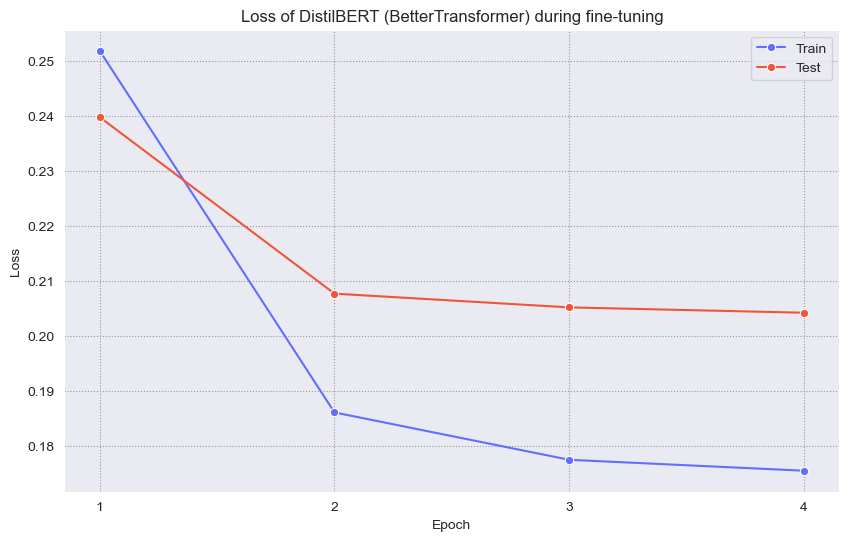

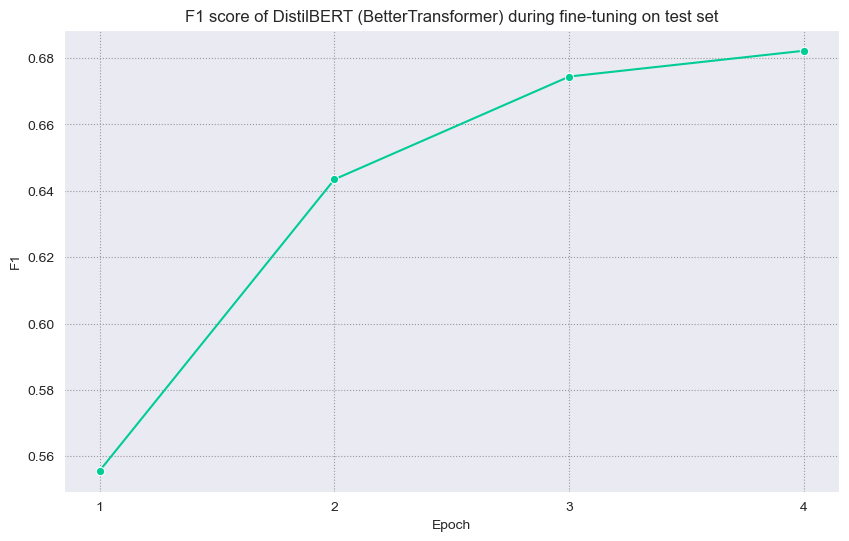

In [45]:
if not distilbert_trained_weights_exist:
    plot_line(db_bt_results[:2], 
            ['Train', 'Test'], 
            'Loss', 
            'Loss of DistilBERT (BetterTransformer) during fine-tuning')
    plot_line(db_bt_results[-1],
            [], 
            'F1', 
            'F1 score of DistilBERT (BetterTransformer) during fine-tuning on test set')
    
    model_scores['distilbert_cased'] = {'F1': db_bt_results[-1][-1]}
else:
    model_scores['distilbert_cased'] = {'F1': db_bt_results[-1]}

Итак, первая модель не смогла добиться поставленного порогового значения целевой метрики $F1$, причем, если судить по графикам функции потерь, вряд ли дальнейшее обучение помогло бы модели улучшить свои результаты, разве лишь только переобучиться на трейне. График функции потерь на тесте уже на 3 эпохе становится пологим, дальнейшего значительного улучшения ожидать не стоит. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Тестовую выборку нужно оставить для финального тестирования Лучшей модели. Для выбора лучшей модели и подбора гиперпараметров нужна ещё одна выборка - валидационная. Именно по ней оцениваются предсказания на "конкурс моделей". Или можно использовать кроссвалидацию, там валидационная выборка генерится автоматически.</font>

In [46]:
del db_train_batch_sampler, db_test_batch_sampler, db_eval_batch_sampler

distilbert_model.to('cpu')
del distilbert_model

---

### 2. DisitlBert + Flash Attention 2 + autocast

Следующей будем обучать вновь $DistilBERT$. Но теперь попробуем взять версию, нечувствительную к регистру. Также факультативно будем использовать другой метод ускорения обучения и инференса модели. Точнее, сразу два - более быструю реализацию механизма *attention* для трансформеров и *mixed precision training*. Второй метод вытекает из первого, т.к. $Flash Attention 2$ работает только с типами данных с половинной точностью.

Объединить все три подхода к ускорению обучения не удалось в связи с некоторыми конфликтами между *flash_attention_2* и *BetterTransformer*. *Mixed precision* с *BetterTransformer* не был использован в связи с отсутствием необходимости в этом. Модель, конвертированная в *BetterTransformer*, и так обучилась крайне быстро, а технической надобности в кастовании модели не было, т.к. не использовались никакие механизмы, требующие этого.

Шаги подготовки данных и обучения модели аналогичны шагам для предыдущей модели с поправкой на отсутствие надобности в динамическом подборе батчей среди последовательностей одинаковой длины, а значит отсутствии всех специфических для прошлой модели шагов. Токенизированные тексты используются от предыдущей модели, чтобы не проводить расчеты лишний раз.

In [47]:
pretrained_weights = 'distilbert/distilbert-base-uncased'

db_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
distilbert_model = (model_class
                    .from_pretrained(pretrained_weights, 
                                     num_labels=2,
                                     torch_dtype=torch.float32, 
                                     attn_implementation="flash_attention_2",
                                     output_attentions=False, 
                                     output_hidden_states=True))
# при явном кастовании весов модели в bfloat16 модель учится плохо, хотя при кастовании в float16
# и замене параметра eps в AdamW с 1e-8 на 1e-4 модель вполне успешно сходится

Flash Attention 2.0 only supports torch.float16 and torch.bfloat16 dtypes, but the current dype in DistilBertForSequenceClassification is torch.float32. You should run training or inference using Automatic Mixed-Precision via the `with torch.autocast(device_type='torch_device'):` decorator, or load the model with the `torch_dtype` argument. Example: `model = AutoModel.from_pretrained("openai/whisper-tiny", attn_implementation="flash_attention_2", torch_dtype=torch.float16)`
You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.
Flash Attention 2.0 only supports torch.float16 and torch.bfloat16 dtypes, but the current dype in DistilBertModel is torch.float32. You should run training or inference using Automatic Mixed-Precision via the `with torch.autocast(device_type='torch_device'):` decorator, or load the model with the `torch_dtype` argument. Example: `model = AutoMode

In [48]:
distilbert_model.to(device)

for param in distilbert_model.base_model.parameters():
    param.requires_grad = False

trainable_params = [param for param in distilbert_model.parameters() if param.requires_grad]

params = [params for params in distilbert_model.named_parameters() if params[1].requires_grad]

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Output Layer ====\n')

for p in params:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("\n{:<55} {:>12}".format('Total number of trainable parameters', sum(p.numel() for p in trainable_params)))

The BERT model has 4 different named parameters.

==== Output Layer ====

pre_classifier.weight                                     (768, 768)
pre_classifier.bias                                           (768,)
classifier.weight                                           (2, 768)
classifier.bias                                                 (2,)

Total number of trainable parameters                          592130


In [49]:
texts_train_tokens = db_tokenizer(list(texts_train), 
                                  truncation=True, 
                                  max_length=512, 
                                  padding=True, 
                                  add_special_tokens=True,
                                  return_tensors='pt')

In [50]:
texts_test_tokens = db_tokenizer(list(texts_test), 
                                 truncation=True, 
                                 max_length=512, 
                                 padding=True, 
                                 add_special_tokens=True,
                                 return_tensors='pt')

In [51]:
texts_eval_tokens = db_tokenizer(list(texts_eval), 
                                 truncation=True, 
                                 max_length=512, 
                                 padding=True, 
                                 add_special_tokens=True,
                                 return_tensors='pt')

In [52]:
db_train_dataset = TensorDataset(texts_train_tokens['input_ids'], 
                                 torch.tensor(target_train.values, dtype=torch.float32), 
                                 texts_train_tokens['attention_mask'])

db_test_dataset  = TensorDataset(texts_test_tokens['input_ids'], 
                                 torch.tensor(target_test.values, dtype=torch.float32), 
                                 texts_test_tokens['attention_mask'])

In [53]:
db_train_loader = DataLoader(db_train_dataset, batch_size=batch_size, num_workers=2, pin_memory=True, prefetch_factor=2)
db_test_loader  = DataLoader(db_test_dataset,  batch_size=batch_size, num_workers=2, pin_memory=True, prefetch_factor=2)

In [54]:
clean_a_bit()

In [55]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(trainable_params, lr=2e-5, eps=1e-8)

In [56]:
# Если есть сохраненные веса модели - загрузить их (для отладочных нужд) 
model_name = 'distilbert_flash_attention_2'
distilbert_trained_weights_exist = False

if os.path.exists(models_path + model_name + '.pt'):
    print('Model weights exist. Loading model weights.')
    distilbert_model.load_state_dict(torch.load(models_path + model_name + '.pt', weights_only=True))
    distilbert_trained_weights_exist = True
else:
    print("No trained model's weights")

No trained model's weights


In [57]:
if not distilbert_trained_weights_exist:
    db_fa2_results = distilbert_trainer(distilbert_model, 4, db_train_loader, db_test_loader, 
                                        optimizer, loss_fn, torch.bfloat16, True, True, model_name)
    print(F'F1 score on last epoch: {db_bt_results[-1][-1]:.4f}')
else:
    db_fa2_results = test_model(db_test_loader, distilbert_model, loss_fn, 
                                torch.bfloat16, True, False, f1_score)
    print(f'F1 score: {db_fa2_results[1]}')

Epoch 1:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

Train loss: 0.1846	 Test loss: 0.1366	 F1 score: 0.6729
Epoch 2:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

Train loss: 0.1419	 Test loss: 0.1298	 F1 score: 0.6907
Epoch 3:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

Train loss: 0.1382	 Test loss: 0.1272	 F1 score: 0.6988
Epoch 4:


Training:   0%|          | 0/3923 [00:00<?, ?it/s]

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

Train loss: 0.1360	 Test loss: 0.1258	 F1 score: 0.7041
F1 score on last epoch: 0.6822


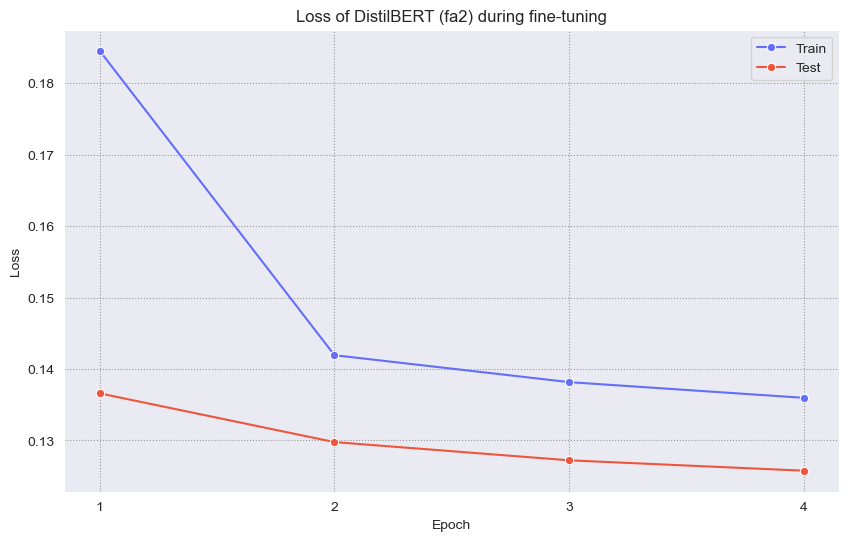

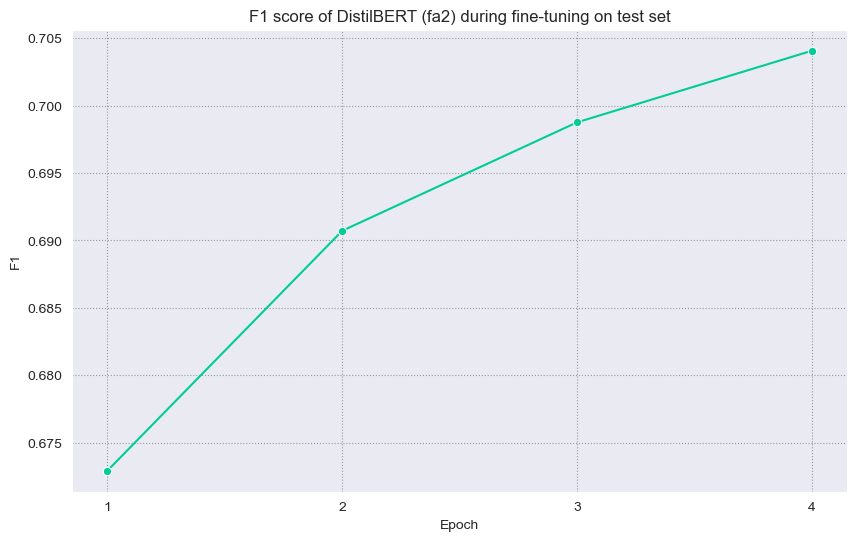

In [58]:
if not distilbert_trained_weights_exist:
    plot_line(db_fa2_results[:2], 
            ['Train', 'Test'],
            'Loss', 'Loss of DistilBERT (fa2) during fine-tuning')
    plot_line(db_fa2_results[-1], 
            [], 
            'F1', 
            'F1 score of DistilBERT (fa2) during fine-tuning on test set')

Вторая модель показала себя чуть лучше предыдущей. Последнее и лучшее значение целевой метрики немного выше, чем у модели, чувствительной к регистру. Однако до порога все еще не хватает около 0.05. что относительно много.

#### Сравнение двух моделей

Проведем небольшой сравнительный анализ двух обученных моделей как по уровню их предсказательных способностей (хотя в данном случае оценка будет не совсем объективной), так и по уровню их вычислительной производительности.

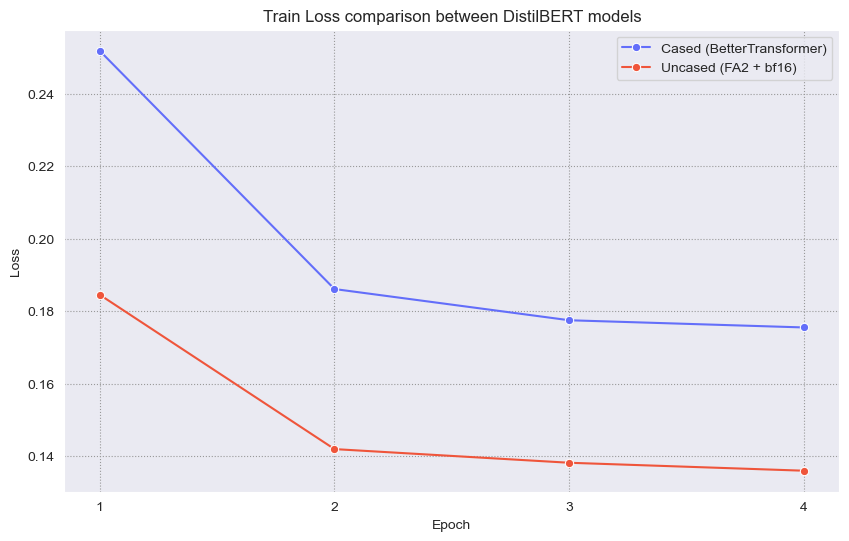

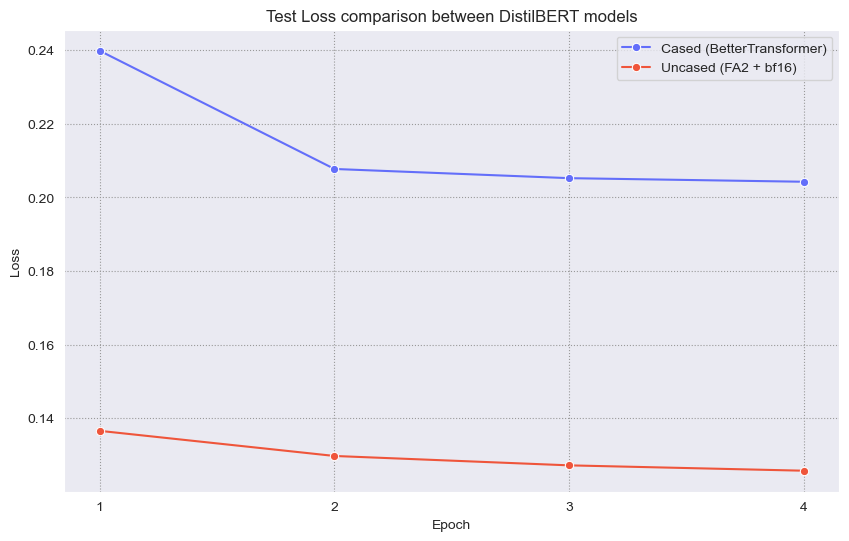

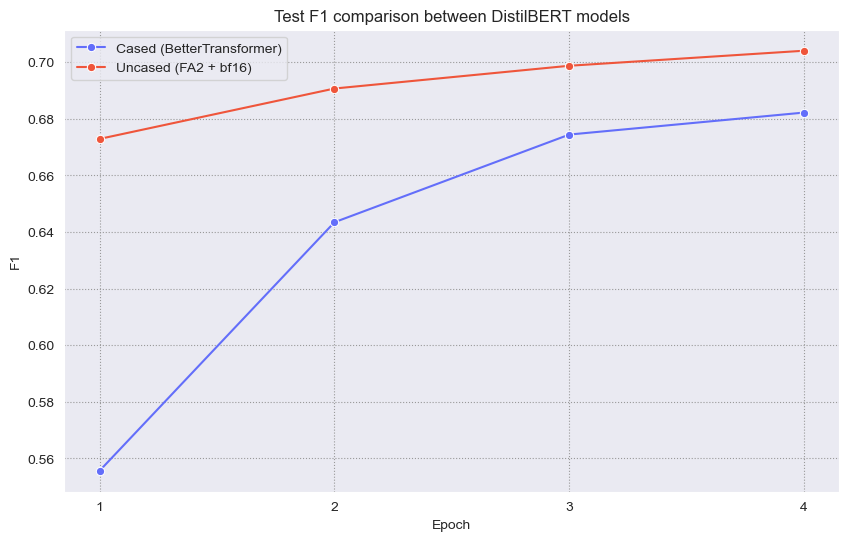

In [146]:
if not distilbert_trained_weights_exist:
    plot_line([db_bt_results[0], db_fa2_results[0]], 
            ['Cased (BetterTransformer)', 'Uncased (FA2 + bf16)'],
            'Loss', 
            'Train Loss comparison between DistilBERT models')

    plot_line([db_bt_results[1], db_fa2_results[1]],
            ['Cased (BetterTransformer)', 'Uncased (FA2 + bf16)'],
            'Loss', 
            'Test Loss comparison between DistilBERT models')
    
    plot_line([db_bt_results[-1], db_fa2_results[-1]],
            ['Cased (BetterTransformer)', 'Uncased (FA2 + bf16)'],
            'F1', 
            'Test F1 comparison between DistilBERT models')

На графиках выше сравнивается скорость падения значений функции потерь, а также скорость роста целевой метрики качества. Как можно увидеть, в вопросе качества предсказаний модель, модель, чувствительная к регистру, уступает своему конкуренту в показателях целевой метрики, хотя по скорости роста *F1* к концу четвертой эпохи модели сравнялись.

Схожая ситуация и с значениями функции потерь. Как и в случае со значениями метрики, модель, нечувствительная к регистру, начинала с более высоких позиций, поэтому скорость падения значений по сравнению с первой моделью не такая существенная. И опять же, к концу четвертой эпохи обе модели практически выходят на плато. Возможно, дальнейшее улучшение моеделй можно было бы достичь, выбрав подходящий *scheduler* для скорости обучения.

In [143]:
if not distilbert_trained_weights_exist:
    plot_bar([db_bt_results[2], db_fa2_results[2]], 
            ['Cased (BetterTransformer)', 'Uncased (FA2 + bf16)'],
            'Time, sec.', 
            'Train duration comparison between DistilBERT models')

    plot_bar([db_bt_results[3], db_fa2_results[3]], 
            ['Cased (BetterTransformer)', 'Uncased (FA2 + bf16)'],
            'Time, sec.', 
            'Test duration comparison between DistilBERT models')
    
    model_scores['distilbert_uncased'] = {'F1': db_fa2_results[-1][-1]}
else:
    model_scores['distilbert_uncased'] = {'F1': db_fa2_results[-1]}

А вот в скорости работы первая модель, реализованная на $BetterTransformer$, показала себя значительно лучше второй. По графикам ясно, что первая модель примерно в $3.5$-$4$ раза быстрее второй, использовавшей для ускорения вычислений быструю функцию внимания и половинную точность вычислений. Причем разница одинаковая как при обучении, так и при инференсе модели.

In [61]:
del db_train_loader, db_test_loader, db_train_dataset, db_test_dataset

distilbert_model = distilbert_model.to('cpu')
del distilbert_model

In [62]:
clean_a_bit()

---

### 3. RoBERTa pretrained toxicity classifier (inference only)

Итак, раз файн-тюнинг DistilBERT-a не дал желаемого результата - обе модели не смогли преодолеть необходимый порог целевой метрики. Теперь же, чтобы наверняка добиться более выского результата без необходимости тренировать более сложную и тяжелую модель, возьмем предобученную модель, заточенную под исходную задачу, но обученную на другой выборке. В качестве базовой модели выберем *RoBERTa* - по сути тот же *BERT*, но с немного видоизмененным токенайзером и более качественными подходами к тренировке модели. В качестве механизмов оптимизации инференса применим SDPA (*flash attention 2* для *RoBERTa* не реализован) и кастование параметров модели к менее точному, но более вычислительно простому типу *torch.float16*.

Т.к. ожидается, что данная модель покажет хороший результат, используем именно ее для того, чтобы получить эмбеддинги для исходных данных. Эти эмбеддинги далее попробуем применить для обучения классических алгоритом классификации.

P.S. *BetterTransformer* применить без использования ранее реализованных кастомных датасета и семплера не получилось. Причина - при попыьке передать в *forward* модели данные с маской приводит к проблемам с несоответствиями размеров внутри реализации метода. Понять, почему это происходит, я не смог. А без маски передавать данные с паддингом нельзя. (Было бы здорово, если бы вы посмотрели на ошибку сами. Можете просто раскомментировать BetterTransformer.transform через две ячейки ниже и запустить любой из вызовов make_predictions_with_roberta).

UPD. Я потестил, это проблема именно BERT-моделей. С DistilBERT таких проблем нет. Я примерно понял, что в реализации написано, судя по всему, если сравнивать с реализацией forward метода у DistilBERT, у обычного BERT пропущены некоторые шаги (речь о реализации BertLayerBetterTransformer).

In [63]:
model_class, tokenizer_class, pretrained_weights = (
    transformers.RobertaForSequenceClassification,
    transformers.RobertaTokenizer,
    's-nlp/roberta_toxicity_classifier'
)

roberta_tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
roberta_model = (model_class
                .from_pretrained(pretrained_weights, 
                                torch_dtype=torch.float32,
                                attn_implementation="sdpa",
                                output_attentions=False, 
                                output_hidden_states=True))

d:\Anaconda\envs\ExpEnv\Lib\site-packages\transformers\tokenization_utils_base.py:1617: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a Ber

In [64]:
params = list(roberta_model.named_parameters())

print('The RoBERTa model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The RoBERTa model has 201 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (50265, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias         

In [65]:
roberta_model.to(device)

# roberta_model = BetterTransformer.transform(roberta_model)
print(roberta_model)
# Не получилось использовать модель после преобразования в BetterTransformer. Модель нормально конвертируется,
# но ведет себя странно в eval режиме (потому что в режиме train attention_mask зануляется), 
# когда при forward-обходе в модель передается attention_mask, 
# вылетает ошибка несоответствия размеров входных данных и заданной формы reshape-маски (300 строчка в encoder_models.py
# в реализации BetterTransformer). Я не понимаю, почему размер входных input_ids меняется внутри реализации.

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [66]:
for param in roberta_model.base_model.parameters():
    param.requires_grad = False

trainable_params = [param for param in roberta_model.parameters() if param.requires_grad]

In [67]:
params = [params for params in roberta_model.named_parameters() if params[1].requires_grad]

print('The RoBERTa model has {:} different named parameters.\n'.format(len(params)))

print('==== Output Layer ====\n')

for p in params:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("\n{:<55} {:>12}".format('Total number of trainable parameters', sum(p.numel() for p in trainable_params)))

The RoBERTa model has 4 different named parameters.

==== Output Layer ====

classifier.dense.weight                                   (768, 768)
classifier.dense.bias                                         (768,)
classifier.out_proj.weight                                  (2, 768)
classifier.out_proj.bias                                        (2,)

Total number of trainable parameters                          592130


In [68]:
roberta_texts_train_tokens = roberta_tokenizer(list(texts_train), 
                                                truncation=True, 
                                                max_length=512, 
                                                padding=True, 
                                                add_special_tokens=True,
                                                return_tensors='pt')

In [69]:
roberta_texts_test_tokens = roberta_tokenizer(list(texts_test), 
                                                truncation=True, 
                                                max_length=512, 
                                                padding=True, 
                                                add_special_tokens=True,
                                                return_tensors='pt')

In [70]:
roberta_texts_eval_tokens = roberta_tokenizer(list(texts_eval), 
                                                truncation=True, 
                                                max_length=512, 
                                                padding=True, 
                                                add_special_tokens=True,
                                                return_tensors='pt')

In [71]:
roberta_train_dataset = TensorDataset(roberta_texts_train_tokens['input_ids'], 
                                      torch.tensor(target_train.values, dtype=torch.float32), 
                                      roberta_texts_train_tokens['attention_mask'])

roberta_test_dataset  = TensorDataset(roberta_texts_test_tokens['input_ids'],
                                      torch.tensor(target_test.values, dtype=torch.float32), 
                                      roberta_texts_test_tokens['attention_mask'])

roberta_eval_dataset  = TensorDataset(roberta_texts_eval_tokens['input_ids'],
                                      torch.tensor(target_eval.values, dtype=torch.float32), 
                                      roberta_texts_eval_tokens['attention_mask'])

In [72]:
roberta_train_loader = DataLoader(roberta_train_dataset, 
                                  batch_size=batch_size, 
                                  num_workers=2, 
                                  pin_memory=True, 
                                  prefetch_factor=2)

roberta_test_loader  = DataLoader(roberta_test_dataset, 
                                  batch_size=batch_size, 
                                  num_workers=2, 
                                  pin_memory=True, 
                                  prefetch_factor=2)

roberta_eval_loader  = DataLoader(roberta_eval_dataset, 
                                  batch_size=batch_size, 
                                  num_workers=2, 
                                  pin_memory=True, 
                                  prefetch_factor=2)

In [73]:
clean_a_bit()

In [74]:
def make_predictions_with_roberta(data_loader, model, datatype, 
                                  scorer, return_embeddings=False):
    model.eval()
    cast_flag = (datatype == torch.float16 or datatype == torch.bfloat16)
    labels_full, predictions = [], []

    if return_embeddings:
        embeddings = []

    with torch.no_grad():
        for batch in tq.tqdm(data_loader, desc='Evaluation'):
            input_ids, labels, attn_mask = [b.to(device) for b in batch]
            if cast_flag:
                with torch.amp.autocast(device_type='cuda', dtype=datatype):
                    outputs = model(input_ids, attention_mask=attn_mask)
            else:
                outputs = model(input_ids, attention_mask=attn_mask)

            labels_full.extend(labels.cpu().numpy())
            predictions.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())

            if return_embeddings:
                last_hidden_state = outputs.hidden_states[-1]
                cls_embeddings = last_hidden_state[:, 0, :].cpu().numpy()
                embeddings.append(cls_embeddings)
    
    score = scorer(labels_full, predictions)
    if return_embeddings:
        return score, np.vstack(embeddings), predictions
    else:
        return score

In [75]:
roberta_train_set_results = make_predictions_with_roberta(roberta_train_loader, 
                                                          roberta_model,
                                                          torch.float16,
                                                          f1_score,
                                                          True)

Evaluation:   0%|          | 0/3923 [00:00<?, ?it/s]

In [76]:
roberta_test_set_results = make_predictions_with_roberta(roberta_test_loader, 
                                                         roberta_model,
                                                         torch.float16,
                                                         f1_score,
                                                         True)

Evaluation:   0%|          | 0/589 [00:00<?, ?it/s]

In [77]:
roberta_eval_set_results = make_predictions_with_roberta(roberta_eval_loader, 
                                                         roberta_model,
                                                         torch.float16,
                                                         f1_score,
                                                         True)

Evaluation:   0%|          | 0/393 [00:00<?, ?it/s]

In [78]:
print(f'RoBERTa pretrained model F1 score on train set: {roberta_train_set_results[0]}')
print(f'RoBERTa pretrained model F1 score on test set: {roberta_test_set_results[0]}')
print(f'RoBERTa pretrained model F1 score on eval set: {roberta_eval_set_results[0]}')
model_scores['RoBERTa_toxic'] = {'F1': roberta_test_set_results[0]}

RoBERTa pretrained model F1 score on train set: 0.8575624082232012
RoBERTa pretrained model F1 score on test set: 0.852667905495089
RoBERTa pretrained model F1 score on eval set: 0.8561348490787927


In [79]:
# # Сохраняю эмбеддинги на всякий случай
# np.savez(embeddings_path + 'roberta_embeddings.npz', 
#          arr1=roberta_train_set_results[1], 
#          arr2=roberta_test_set_results[1], 
#          arr3=roberta_eval_set_results[1])

# # Загружаю эмбеддинги
# roberta_train_set_results = [0]
# roberta_test_set_results = [0]
# roberta_eval_set_results = [0]

# data = np.load(embeddings_path + 'roberta_embeddings.npz')
# roberta_train_set_results.append(data['arr1'])
# roberta_test_set_results.append(data['arr2'])
# roberta_eval_set_results.append(data['arr3'])

# del data

Теперь, когда у нас есть векторное представление текстов, можно попробовать его визуализировать на плоскости, чтобы получить **приблизительное** представление о распределении исходной выборки и двух классов в ней. Для получения проекции используем нелинейный метод снижения размерности пространства признаков - $UMAP$. К ообенностям $UMAP$ можно отнести принцип его работы - построение отображения, которое будет пытаться сохранить баланс между внутренними локальными и общими глоабльными структурами в данных. Кроме того, в отличие от аналогичного метода $TSNE$, *UMAP* работает намного быстрее, особенно когда речь идет о больших выборках (*TSNE* на большом количестве данных сторит отображение очень долго).

In [80]:
mapper = umap.UMAP(n_components=2, 
                   n_neighbors=50,
                   min_dist=0.0,
                   metric='euclidean',
                   n_jobs=-1)

mapper.fit(np.vstack((roberta_train_set_results[1], 
                      roberta_test_set_results[1])))

UMAP(min_dist=0.0, n_neighbors=50, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

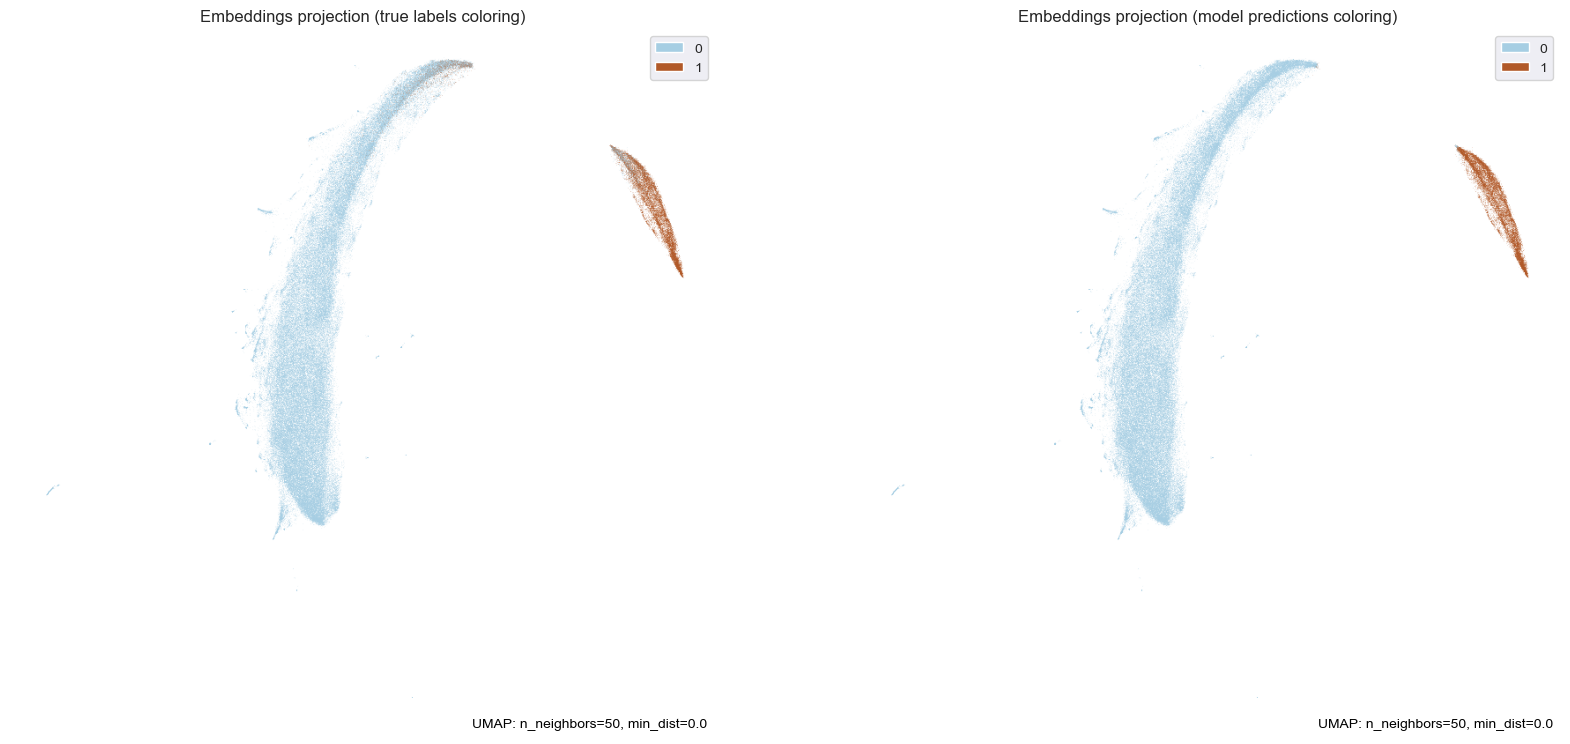

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
umap.plot.points(mapper, 
                 labels=np.concatenate((target_train.values,
                                        target_test.values)), 
                 color_key_cmap='Paired',
                 ax=axs[0])
axs[0].set_title('Embeddings projection (true labels coloring)')

umap.plot.points(mapper, 
                 labels=np.concatenate((roberta_train_set_results[2],
                                        roberta_test_set_results[2])), 
                 color_key_cmap='Paired',
                 ax=axs[1])
axs[1].set_title('Embeddings projection (model predictions coloring)')

plt.show()

Как можно увидеть на графиках выше, с помощью полученных эмбеддингов удалось практически идеально отделить два класса друг от друга. На графике слева изображено отображение эмбеддингов с правильной маркировкой. Можно заметить два четко сформированных кластера, каждый из которых почти полностью состоит из наблюдений только одного класса. Причем на графике отражается факт наличия дасбаланса классов в выборке: кластер токсичных комментариев заметно меньше нетоксичного кластера. Однако на графике слева также можно и увидеть редкие смешения двух классов, в областях кластеров, в которых расстояние до соседнего кластера минимальное. Стоит упомянуть, что хоть *UMAP* и старается сохранить как локальную, так и глобальную структуру данных, но само расстояние между точками как величина на графике отображения особого смысла не имеет. Единственное, что можно подчерпнуть из такого отображения - факт наличия зазора между кластерами. Вполне возможно, что в пространстве большей размерности два кластера могли слегка перемешиваться (все-таки данные в большей размрености гораздо более разреженные). Однако из-за особенностей построения отображения алгоритм каким-то образом разделил и отдалил два кластера друг от друга, случайно захватив лишние точки, которые фактически были ближе к чужому кластеру, чем к своему, либо же имели больше соседей из чужого кластера, чем из своего.

График справа показывает, как модель справилась с классификацией. Здесь чудес нет - модель идеально провела черту между двумя кластерами. Однако из-за тех самых редких вкраплений в кластеры представителей противоположного класса построить абсолютно идеальное разделение вряд ли получится. Так что полученный результат можно оценивать как вполне удовлетворительный, учитывая также тот факт, что модели удалось преодолеть установленный порог качества, набрав на тестовой выборке $0.8526$ по метрике $F1$.

In [82]:
# Удаляю более ненужные предсказания модели
roberta_train_set_results = [x for x in roberta_train_set_results[:2]]
roberta_test_set_results = [x for x in roberta_test_set_results[:2]]
roberta_eval_set_results = [x for x in roberta_eval_set_results[:2]]

In [83]:
roberta_model = roberta_model.to('cpu')
del roberta_model, roberta_train_dataset, roberta_train_loader
del roberta_test_dataset, roberta_test_loader
del roberta_eval_dataset, roberta_eval_loader

In [84]:
clean_a_bit()

---

## Обучение классификаторов на эмбеддингах RoBERTa

Т.к. благодаря RoBERTa были собраны векторные представления для текстов, их можно применить в обучении более простых алгоритмов. В качестве таких возьмем логистическую регрессию и $Catboost$, первая модель - максимально простая линейная модель, а вторая - нелинейная, способная улавливать куда более сложные закономерности и в целом среди классических алгоритмов ML являющаяся одной из самых эффективных.

Обучим каждую модель без подбора оптимальных гиперпараметров. Каждую из моделей обучим 3 раза:

1) на полученных из трансформера векторах;
2) на выборке после downsampling-а;
3) на векторах меньшей разммерности.

In [112]:
def train_simple_models(train_set, target_train, test_set, target_test, log_reg_params={}):

    results = {}
    
    # Logistic regression

    lr_clf = LogisticRegression(max_iter=1000, 
                                penalty='l1', 
                                solver='saga', 
                                C=0.5,
                                random_state=RANDOM_SEED,
                                **log_reg_params)
    lr_clf.fit(train_set, target_train)
    predictions = lr_clf.predict(test_set)
    f1_logreg = f1_score(target_test, predictions)
    results['Logistic regerssion'] = {'F1': f1_logreg, 'model': lr_clf}
    sleep(3)
    print(f'Logistic regression F1 score on test set: {f1_logreg:.4f}')
    print("\n\n", '#' * 100, '\n\n')

    ###################################################

    # Catboost

    train_pool = Pool(train_set, label=target_train)
    test_pool  = Pool(test_set,  label=target_test)

    params = {
        'task_type':             'GPU',
        'iterations':            250,
        'max_depth':             7,
        'custom_metric':         ['F1'],
        'loss_function':         'Logloss',
        'bootstrap_type':        'Bayesian',
        'early_stopping_rounds': 10,
        'random_seed':           RANDOM_SEED
    }


    cb_clf = CatBoostClassifier(**params)
    cb_clf.fit(train_pool, plot=True, verbose=False)

    cb_predictions = cb_clf.predict(test_pool)
    f1_catboost = f1_score(target_test, cb_predictions)
    results['Catboost'] = {'F1': f1_catboost, 'model': cb_clf}
    print(f'\nCatboost F1 score on test set: {f1_catboost:.4f}')

    clean_a_bit()

    return results

In [121]:
results_default = train_simple_models(roberta_train_set_results[1], target_train.values,
                                      roberta_test_set_results[1], target_test.values,
                                      {'class_weight': 'balanced'})

Logistic regression F1 score on test set: 0.8054


 #################################################################################################### 




MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Catboost F1 score on test set: 0.8581


In [122]:
for model_name, sub_dict in results_default.items():
    model_scores[model_name + '_default'] = {'F1': sub_dict['F1']}

---

## Downsampling эмбеддингов и повторное обучение тех же классификаторов

Т.к. в данных имеется сильный дисбаланс классов, попробуем уменьшить разницу между размерами классов и обучить те же два классификатора на новой уменьшенной, но более сбалансированной выборке.

In [123]:
rus = RandomUnderSampler(sampling_strategy=0.5, replacement=False, random_state=RANDOM_SEED)
train_embeddings_ds, target_train_ds = rus.fit_resample(roberta_train_set_results[1], target_train.values)
np.unique(target_train_ds, return_counts=True)

(array([0, 1], dtype=int64), array([25494, 12747], dtype=int64))

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что балансируются только обучающие данные.</font>

In [124]:
results_downsampled = train_simple_models(train_embeddings_ds, target_train_ds,
                                          roberta_test_set_results[1], target_test.values)

for model_name, sub_dict in results_downsampled.items():
    model_scores[model_name + '_default'] = {'F1': sub_dict['F1']}

Logistic regression F1 score on test set: 0.8326


 #################################################################################################### 




MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Catboost F1 score on test set: 0.8290


In [125]:
del train_embeddings_ds, target_train_ds

---

## Снижение размерности

Еще одним возможным вариантом улучшения классификации может быть снижение размерности векторного пространства признаков. Большая размерность довольно часто может приводить к проблеме проклятия размерности. Методы снижения размерности чаще всего пытаются сохранить как можно больше информативной составляющей из взаимного расположения данных, избавившись от лишнего, например, от шумов, как в случае с *PCA*. Другие методы, вроде *T-SNE* или *UMAP*, стараются как можно точнее сохранить и передать информацию о взаимном расположении точек в пространстве более высокой размерности. Кроме того, снижение размерности уменьшает разреженность в данных и увеличивает смысловую нагрузку расстояния между наблюдениями.  

In [126]:
def reduce_dimensionality(train: List[List[int]],
                          test:  List[List[int]], 
                          method: str, 
                          params: dict = {}):
    if method == 'PCA':
        print('Method: PCA')
        if params:
            reduction_method = PCA(**params)
        else:
            reduction_method = PCA(svd_solver='full', 
                                   n_components=72,
                                   random_state=RANDOM_SEED) # 95% дисперсии, проверил вручную
    
    # классификация после UMAP у логрегрессии ломается, а у катбуста ухудшается. Надо тюнить параметры метода
    elif method == 'UMAP':
        print('Method: UMAP')
        if params:
            reduction_method = umap.UMAP(**params)
        else:
            reduction_method = umap.UMAP(n_components=72, 
                                         n_neighbors=50,
                                         min_dist=0.0,
                                         metric='euclidean',
                                         n_jobs=-1)

    train_low_dim = reduction_method.fit_transform(train)
    test_low_dim  = reduction_method.transform(test)
    print(f'Dimensionaluty before reduction: {train.shape[1]}')
    print(f'Dimensionaluty after reduction: {train_low_dim.shape[1]}')
    return train_low_dim, test_low_dim, reduction_method

#### PCA

In [127]:
train_embeddings_low_dim_pca, test_embeddings_low_dim_pca, pca_reduction = reduce_dimensionality(roberta_train_set_results[1], 
                                                                                                 roberta_test_set_results[1],
                                                                                                 'PCA')

Method: PCA
Dimensionaluty before reduction: 768
Dimensionaluty after reduction: 72


In [128]:
results_pca = train_simple_models(train_embeddings_low_dim_pca, target_train.values,
                              test_embeddings_low_dim_pca, target_test.values,
                              {'class_weight': 'balanced'})

for model_name, sub_dict in results_pca.items():
    model_scores[model_name + '_pca'] = {'F1': sub_dict['F1']}

Logistic regression F1 score on test set: 0.7875


 #################################################################################################### 




MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Catboost F1 score on test set: 0.8570


In [129]:
del train_embeddings_low_dim_pca, test_embeddings_low_dim_pca

#### UMAP

In [130]:
train_embeddings_low_dim_umap, test_embeddings_low_dim_umap, umap_reduction = reduce_dimensionality(roberta_train_set_results[1], 
                                                                                                    roberta_test_set_results[1],
                                                                                                    'UMAP')

Method: UMAP
Dimensionaluty before reduction: 768
Dimensionaluty after reduction: 72


In [131]:
results_umap = train_simple_models(train_embeddings_low_dim_umap, target_train.values,
                                   test_embeddings_low_dim_umap, target_test.values,
                                   {'class_weight': 'balanced'})

for model_name, sub_dict in results_umap.items():
    model_scores[model_name + '_umap'] = {'F1': sub_dict['F1']}

Logistic regression F1 score on test set: 0.7733


 #################################################################################################### 




MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


Catboost F1 score on test set: 0.8542


In [132]:
del train_embeddings_low_dim_umap, test_embeddings_low_dim_umap

---

## Сравнение моделей

In [133]:
def compare_models(results):
    data = []

    for model_name, metrics in results.items():
        f1 = metrics['F1']
        data.append({'Model': model_name, 'F1': f1})

    df = pd.DataFrame(data).sort_values(by='F1', ascending=False)
    display(df.style.background_gradient(cmap='coolwarm'))

In [134]:
compare_models(model_scores)

,Model,F1
6,Catboost_pca,0.856988
8,Catboost_umap,0.854178
2,RoBERTa_toxic,0.852668
3,Logistic regerssion_default,0.832592
4,Catboost_default,0.829006
5,Logistic regerssion_pca,0.787476
7,Logistic regerssion_umap,0.773345
1,distilbert_uncased,0.704079
0,distilbert_cased,0.682225


Лучшей моделью по результатам сравнения целевой метрики на тестовой выборке оказался $Catboost$, обученный на эмбеддингах $RoBERTa$ после их снижения размерности с помощью $PCA$. Можно предположить, что применение $PCA$ в данном случае сыграло в качестве меры регуляризации, удалив шумовые или малоинформативные признаки, позволив модели уловить более фундаментальные и важные закономерности. Отдельно стоит отметить, что $Catboost$ в связке с $ UMAP$ дал второй лучший результат. Третий результат показала непосредственно сама $RoBERTa$. Однако разница между тремя моделями всего не столь существенная - в десятые доли метрики. Но все же, 250 деревьев в обоих случаях чуть лучше обобщили векторы-признаки, чем нейронка (двухслойная полносвязная сеть с 768 нейронами на кажом слое - уровень классификации в модели трансформера).

Очень хорошо для своей простоты справилась логистическая регрессия. Если возвращаться к двумерному отображению эмбеддингов, это не удивительно, т.к. гиперплоскость, почти идеально разделяющая два кластера, очень вероятно, что существует. А учитывая, что вычислительно получать предсказания из модели логистической регрессии намного проще и быстрее, чем из трансформера или последовательности дереьвев, результат логрегрессии более чем удовлетворительный и заслуживающий внимания, учитывая, что значение метрики не настолько и ниже, чем у моделей выше.

А вот зафайнтюненые модели $DistilBERT$ в обоих случаях показали себя не очень хорошо, особенно если сравнивать их показатели с более успешными моделями.

---

## Качество лучшей модели на валидационной выборке

In [139]:
eval_embeddings_low_dim_pca = pca_reduction.transform(roberta_eval_set_results[1])

In [140]:
eval_pool = Pool(eval_embeddings_low_dim_pca, label=target_eval.values)

cb_predictions = results_pca['Catboost']['model'].predict(eval_pool)
f1_catboost = f1_score(target_eval.values, cb_predictions)
print(f'\nCatboost F1 score on eval set: {f1_catboost:.4f}')

clean_a_bit()


Catboost F1 score on eval set: 0.8629


Лучшая из рассмотренных моделей - $Catboost$, обученные на эмбеддингах $RoBERTa$ после применения к ним $PCA$, на отложенной выборке показал результат, почти аналогичный метрике модели на трейне и тесте - $F1 = 0.8629$. Такая стабильность метрики сигнализирует о том, что модель довольно успешно смогла генерализовать данные в целом. 

---

## Вывод

В ходе работы были изучены данные комментариев клиентов и описаний товаров интернет-магазина **Викишоп**. Целью работы была разработка системы фильтрации токсичных комментариев. В качестве основного требования был установлен порог качества метрики $F1$ - не меньше $0.75$.

Для создания подобной системы в качестве основного подхода был выбран метод составления векторного представления слов с применением текстовых моделей-трансформеров. Были рассмотрены некоторые базовые предобученные модели из семейства $BERT$. 

В качестве простой, легковесной и быстрой модели был выбарн $DistilBERT$ - модель, полученная из полноразмерного $BERT$-а путем процедуры дистилляции. Модель, как заявлено ее разработчиками, лишь немного уступает полной модели на бенчмарках, значительно опережая ее по быстродействуию и экономии памяти. Данная модель из-за перечисленных особенностей была использована для файн-тюнинга ее на предоставленных данных. Благодаря всем рассмотренным модификациям, вроде использования вместо дефолтной реализации трансформеров в $PyTorch$ более быстрой и эффективной $BetterTransformer$, использования более эффективной функции внимания $FlashAttention2$ и вычислений с половинной точностью, процесс обучения удалось сократить с $20$ минут до $1:30$ - $5$ минут в зависимости от выбранного метода оптимизации, или ускорить обучение с $2$ итераций в секунду до $10-150$. Стоит упомянуть, что обучение проводилось с использованием $GPU$, и все результаты описаны по результатам тестов на конкретном железе.

В качестве более сложной модели была взята $RoBERTa$ - модель аналогичной $BERT$-у архитектуры с некоторыми изменениями в методах обучения модели и ее токенизаторе. Т.е. основное и ключевое отличие $RoBERTa$ от $BERT$ - более качественное обучение, действительно приведшее к улучшению метрик модели в ключевых задачах NLP. Для простоты была взята модель, уже предобученная решать аналогичную задачу бинарной классификации, но обученная на другой выборке, разумеется. Помимо использования непосредственно самой модели для классификации комментариев, из нее были извлечены эмбеддинги текстов. Полученные эмбеддинги были позже использованы в качестве векторов-признаков в моделях классического машинного обучения.

Из классических алгоритмов были рассмотрены логистическая регрессия и градиентный бустинг на деревьях в реализации $Catboost$ - одна очень простая и одна очень сильная модель. Каждая из моделей была обучена 4 раза - сначала на эмбеддингах без изменений, затем на эмбеддингах после downsampling-а, чтобы побороть дисбаланс классов в выборке, и в конце - на векторах уменьшенной размерности. Для снижения размерности векторов-признаков выбраны два метода - один линейный и один нелинейный - $PCA$ и $UMAP$ соответственно. Снижение размерности было призвано побороть потенциальную проблему проклятия размерност. Косвенно примененные методы могли сыграть в роли методов регуляризации, устранив шумы в данных и ликвидировав малоинформативные признаки.

По итогам работы было обучено две модели $DistilBERT$ - одна чувствительна к регистру, другая - нет. Однако обученные модели показали неудовлетворительные результаты. Предобученная $RoBERTa$ же сразу показала результат значительно выше порога целевой метрики, достигнув примерно $0.85$ по $F1$. Анализ проекции полученных трансформером эмбеддингов показал хорошую разделимость двух классов, а также объяснил потенциальную невозможность добиться сильно лучшего результата с имеющимися векторными представлениями.

Извлеченные эмбеддинги были использованы в качестве входных данны для логрегрессии и градиентного бустинга. Модели, обученные на эмбеддингах без преобразований, показали чуть более худшие результаты, чем трансформер. Однако использование техник снижения размерности позволило $Catboost$-у немного превзойти $RoBERTa$, хотя результаты логистической регрессии при этом существенно ухудшились.

В результате луший результат, т.е. лучшую метрику на тестовой выборке показала модель градиентного бустинга, обученная на эмбеддингах после применения $PCA$ на них. Ее метрика $F1$ на валидационной выборке равна $0.8629$, что значительно выше установленного порога качества.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> К сожалению, ни одна из моделей не показала результат выше 0.75 F1-меры на тестовых данных.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>
Что можно попробовать:
- Векторизаторы NLTK (TfIdf, Bow)
- Методы работы с дисбалансом
- Подбор Регуляризации
- Использовать спец. модели для этой задачи.
</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Петр, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>